In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.shape

(918, 12)

### Find null and duplicate values

In [5]:
print(df.isnull().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [6]:
df.duplicated().sum()

np.int64(0)

### Handling categorical variables

In [7]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

In [8]:
df_encoded = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

In [9]:
print(df_encoded.head())
print(df_encoded.info())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0             0               True              False   
1      1.0             1              False               True   
2      0.0             0               True              False   
3      1.5             1              False              False   
4      0.0             0              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0             False               True          False          False   
1             False 

### Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

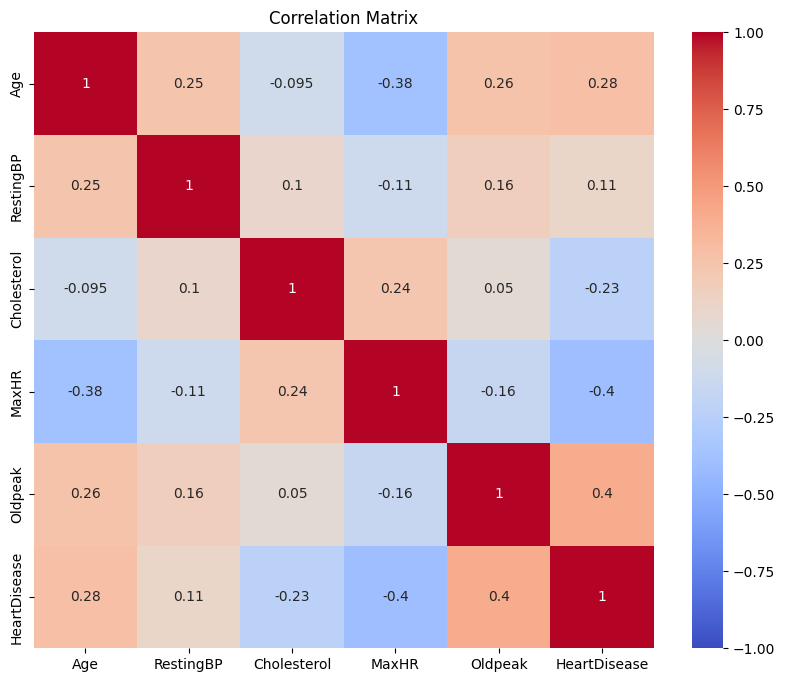

In [ ]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
correlation_matrix = df_encoded[numerical_features + ['HeartDisease']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


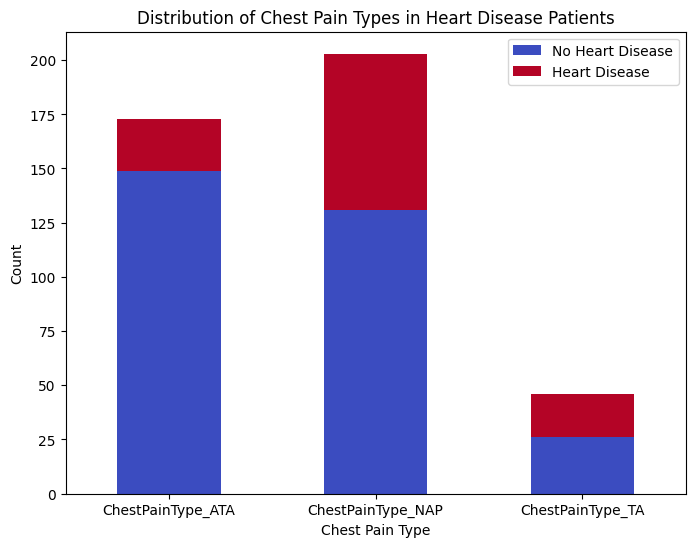

In [ ]:
import matplotlib.pyplot as plt

chest_pain_cols = ['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']
heart_disease_col = 'HeartDisease'

chest_pain_counts = df_encoded.groupby(heart_disease_col)[chest_pain_cols].sum()

chest_pain_counts.T.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Distribution of Chest Pain Types in Heart Disease Patients")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0)
plt.show()



### Logistic Regression

In [ ]:
# Train the model
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=["HeartDisease"])
y = df_encoded["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, str)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Logistic Regression Accuracy: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Confusion Matrix:
 [[67 10]
 [17 90]]


### Random Forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8586956521739131
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Confusion Matrix:
[[65 12]
 [14 93]]
